<div>
<img src="https://cdn-images-1.medium.com/max/1024/1*-QTg-_71YF0SVshMEaKZ_g.png" 
   width="400" style="margin: 50px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
<!--NAVIGATION-->
# [PyTorch Primer](1-pytorch.ipynb) | TensorFlow Primer | [PyT vs TF](3-pytorch_vs_tf.ipynb) | [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-TensorFlow)
#### 3. [Basics of TensorFlow](##Basics-of-TensorFlow)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)



# Building TensorFlow

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

# Basics of TensorFlow

#### Tensors and Properties

#### Methods on Tensors

###### Sum

In [1]:
import tensorflow as tf
print(f"Version of TF version: {tf.__version__}")

# Set seed for reproducibility
tf.random.set_seed(0)
# Random Matrix of shape=(3,3)
x = tf.random.normal((3,3), mean=0.0, stddev=1.0, dtype=tf.dtypes.float32,\
                     seed=None,name=None)
print(f"x: {x}")


Version of TF version: 2.11.0
x: [[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]]


###### Reshape : `view` and  `reshape`  methods

In [8]:
#### Inplace Reshaping
# A vector of length N=10
x = tf.convert_to_tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])
print(tf.shape(x))
print(tf.shape(x).numpy())

x = tf.reshape(x, [4, 3])
print(tf.shape(x).numpy())
print(x)

tf.Tensor([12], shape=(1,), dtype=int32)
[12]
[4 3]
tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]], shape=(4, 3), dtype=int32)


###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [ ]:
tf.random.set_seed(0)
x = tf.random.normal((10,1))
l1 = tf.norm(x, ord=1)
l2 = tf.norm(x, ord=2)

print(f"L1 Norm of x is:{l1}")
print(f"L2 Norm of x is:{l2}")


###### Computing Norm of a vector without using the method

In [ ]:
n1 = tf.reduce_sum(tf.abs(x))
print(f"L1 norm: is: {n1}")
n2 = tf.sqrt(tf.reduce_sum(x**2))
print(f"L2 norm: is: {n2}")


### Tensors on GPU

In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)




[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Mapping tensors to GPU

In [10]:
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


### NumPy ----> TensorFlow ----> NumPy

In [11]:
import numpy as np
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=float)
x_tf = tf.convert_to_tensor(x, dtype=tf.float32)
print("*******NumPy To Tensor*******)")
print("Numpy array is:", x)
print("TF Tensor is:", x_tf)
print("*******Tensor To NumPy*******")
print("TF Tensor is:", x_tf.numpy())


*******NumPy To Tensor*******)
Numpy array is: [[1. 2. 3.]
 [4. 5. 6.]]
TF Tensor is: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
*******Tensor To NumPy*******
TF Tensor is: [[1. 2. 3.]
 [4. 5. 6.]]


### Eager mode and Graph mode


In [2]:
import tensorflow as tf
import timeit

In [5]:
#tf.config.run_functions_eagerly(False)

x = tf.constant([1., 4., 9., 16., 25.])

## Eager Function
def f_e(x):
    y=x ** 2
    print("Evaluted in Eager Mode y:", y)
    return y 


## Explain tf.print and jit_compile=True
@tf.function(jit_compile=True)
def f_g(x):
    y=x ** 2
    print("Evaluted in Graph Mode y:", y) 
    #tf.print("Evaluted in Graph Mode y:", y)
    return y 

#print("Graph time:", timeit.timeit(lambda: f_g(x), number=1000))
print("Eager time:", timeit.timeit(lambda: f_e(x), number=1000))


Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)

Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)

Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)
Evaluted in Eager Mode y: tf.Tensor([  1.  16.  81. 256. 625.], shape=(5,), dtype=float32)

### Function Approximation

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt


batch_size = 50
x = np.linspace(-1, 1, num=batch_size)
x_eval = np.linspace(-0.8, 0.8, num=batch_size).reshape(-1,1)


y = x**2
# Add Random Noise
y = y + 0.05*np.random.normal(np.shape(y))
#y = 2*((y - np.min(y))/(np.max(y) - np.min(y))) - 1
x = x.reshape((-1, 1))
y = y.reshape((-1, 1)) 

y_eval = x_eval**2
#y_eval = 2*((y_eval - np.min(y_eval))/(np.max(y_eval) - np.min(y_eval))) - 1


### Sequential model
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=x.shape[1],\
                             kernel_initializer='he_normal', \
                             activation="tanh"))

model.add(keras.layers.Dense(32, kernel_initializer='he_normal', \
                             activation="tanh"))
print(model.predict(x).shape)
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))

model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mse'])

model.fit(x, y, epochs=5000, batch_size=np.size(x), verbose=1)

y_pred = model.predict(x, batch_size=np.size(x))





2/2 [==============================] - 0s 2ms/step
(50, 32)
Epoch 1/5000
1/1 [==============================] - 0s 440ms/step - loss: 8.3412 - mse: 8.3412
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 8.2368 - mse: 8.2368
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.1431 - mse: 8.1431
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.0601 - mse: 8.0601
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.9875 - mse: 7.9875
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.9240 - mse: 7.9240
Epoch 7/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.8678 - mse: 7.8678
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.8160 - mse: 7.8160
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.7658 - mse: 7.7658
Epoch 10/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.7144 - mse: 7.7144
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.5591 - mse: 0.5591
Epoch 88/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5233 - mse: 0.5233
Epoch 89/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4914 - mse: 0.4914
Epoch 90/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4631 - mse: 0.4631
Epoch 91/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4384 - mse: 0.4384
Epoch 92/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4168 - mse: 0.4168
Epoch 93/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3982 - mse: 0.3982
Epoch 94/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3823 - mse: 0.3823
Epoch 95/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3689 - mse: 0.3689
Epoch 96/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3576 - mse: 0.3576
Epoch 97/5000
1/1 [==============================] - 0s 4ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.1993 - mse: 0.1993
Epoch 174/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1983 - mse: 0.1983
Epoch 175/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1974 - mse: 0.1974
Epoch 176/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1964 - mse: 0.1964
Epoch 177/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1955 - mse: 0.1955
Epoch 178/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1946 - mse: 0.1946
Epoch 179/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1936 - mse: 0.1936
Epoch 180/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1927 - mse: 0.1927
Epoch 181/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1918 - mse: 0.1918
Epoch 182/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1909 - mse: 0.1909
Epoch 183/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.1302 - mse: 0.1302
Epoch 260/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1294 - mse: 0.1294
Epoch 261/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1286 - mse: 0.1286
Epoch 262/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1279 - mse: 0.1279
Epoch 263/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1271 - mse: 0.1271
Epoch 264/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1263 - mse: 0.1263
Epoch 265/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1255 - mse: 0.1255
Epoch 266/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1247 - mse: 0.1247
Epoch 267/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1239 - mse: 0.1239
Epoch 268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1231 - mse: 0.1231
Epoch 269/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0603 - mse: 0.0603
Epoch 346/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0595 - mse: 0.0595
Epoch 347/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0588 - mse: 0.0588
Epoch 348/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0580 - mse: 0.0580
Epoch 349/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0573 - mse: 0.0573
Epoch 350/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0566 - mse: 0.0566
Epoch 351/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0559 - mse: 0.0559
Epoch 352/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551 - mse: 0.0551
Epoch 353/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mse: 0.0544
Epoch 354/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0537 - mse: 0.0537
Epoch 355/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0198 - mse: 0.0198
Epoch 432/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0196 - mse: 0.0196
Epoch 433/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0194 - mse: 0.0194
Epoch 434/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0192 - mse: 0.0192
Epoch 435/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0190 - mse: 0.0190
Epoch 436/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0188 - mse: 0.0188
Epoch 437/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0186 - mse: 0.0186
Epoch 438/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0184 - mse: 0.0184
Epoch 439/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183
Epoch 440/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181
Epoch 441/5000
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0101 - mse: 0.0101
Epoch 518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0100 - mse: 0.0100
Epoch 519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0100 - mse: 0.0100
Epoch 520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099
Epoch 521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 522/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0098 - mse: 0.0098
Epoch 523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 524/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 525/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 526/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095 - mse: 0.0095
Epoch 527/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063
Epoch 604/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063
Epoch 605/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - mse: 0.0062
Epoch 606/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - mse: 0.0062
Epoch 607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - mse: 0.0062
Epoch 608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 612/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060 - mse: 0.0060
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 690/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041
Epoch 691/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 692/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 693/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 694/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 695/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 696/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 697/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 698/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 699/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 776/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 777/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 778/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 779/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 780/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026
Epoch 781/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026
Epoch 782/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 783/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026
Epoch 784/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 785/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 862/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 863/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 864/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 865/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 866/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 867/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 868/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018
Epoch 869/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 870/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 871/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 948/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 949/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 950/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 951/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 952/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 957/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1035/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1036/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1037/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1038/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1039/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1040/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1041/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1042/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1043/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 8.5098e-04 - mse: 8.5098e-04
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.4887e-04 - mse: 8.4887e-04
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.4677e-04 - mse: 8.4677e-04
Epoch 1116/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.4468e-04 - mse: 8.4468e-04
Epoch 1117/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.4259e-04 - mse: 8.4259e-04
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.4051e-04 - mse: 8.4051e-04
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.3844e-04 - mse: 8.3844e-04
Epoch 1120/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.3638e-04 - mse: 8.3638e-04
Epoch 1121/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.3432e-04 - mse: 8.3432e-04
Epoch 1122/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.322

1/1 [==============================] - 0s 3ms/step - loss: 7.0687e-04 - mse: 7.0687e-04
Epoch 1192/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0525e-04 - mse: 7.0525e-04
Epoch 1193/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.0363e-04 - mse: 7.0363e-04
Epoch 1194/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0203e-04 - mse: 7.0203e-04
Epoch 1195/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.0042e-04 - mse: 7.0042e-04
Epoch 1196/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9882e-04 - mse: 6.9882e-04
Epoch 1197/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9723e-04 - mse: 6.9723e-04
Epoch 1198/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9564e-04 - mse: 6.9564e-04
Epoch 1199/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9405e-04 - mse: 6.9405e-04
Epoch 1200/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.924

1/1 [==============================] - 0s 3ms/step - loss: 5.9356e-04 - mse: 5.9356e-04
Epoch 1270/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.9226e-04 - mse: 5.9226e-04
Epoch 1271/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.9096e-04 - mse: 5.9096e-04
Epoch 1272/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8966e-04 - mse: 5.8966e-04
Epoch 1273/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8837e-04 - mse: 5.8837e-04
Epoch 1274/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8708e-04 - mse: 5.8708e-04
Epoch 1275/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8579e-04 - mse: 5.8579e-04
Epoch 1276/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8451e-04 - mse: 5.8451e-04
Epoch 1277/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.8322e-04 - mse: 5.8322e-04
Epoch 1278/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.819

1/1 [==============================] - 0s 3ms/step - loss: 5.0083e-04 - mse: 5.0083e-04
Epoch 1348/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9974e-04 - mse: 4.9974e-04
Epoch 1349/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9866e-04 - mse: 4.9866e-04
Epoch 1350/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9758e-04 - mse: 4.9758e-04
Epoch 1351/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9651e-04 - mse: 4.9651e-04
Epoch 1352/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9543e-04 - mse: 4.9543e-04
Epoch 1353/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9437e-04 - mse: 4.9437e-04
Epoch 1354/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9330e-04 - mse: 4.9330e-04
Epoch 1355/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9223e-04 - mse: 4.9223e-04
Epoch 1356/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.911

1/1 [==============================] - 0s 3ms/step - loss: 4.2306e-04 - mse: 4.2306e-04
Epoch 1426/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2214e-04 - mse: 4.2214e-04
Epoch 1427/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2123e-04 - mse: 4.2123e-04
Epoch 1428/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.2032e-04 - mse: 4.2032e-04
Epoch 1429/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1941e-04 - mse: 4.1941e-04
Epoch 1430/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1850e-04 - mse: 4.1850e-04
Epoch 1431/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1760e-04 - mse: 4.1760e-04
Epoch 1432/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1669e-04 - mse: 4.1669e-04
Epoch 1433/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.1579e-04 - mse: 4.1579e-04
Epoch 1434/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.148

1/1 [==============================] - 0s 3ms/step - loss: 3.5705e-04 - mse: 3.5705e-04
Epoch 1504/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5627e-04 - mse: 3.5627e-04
Epoch 1505/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.5549e-04 - mse: 3.5549e-04
Epoch 1506/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5472e-04 - mse: 3.5472e-04
Epoch 1507/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5394e-04 - mse: 3.5394e-04
Epoch 1508/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5317e-04 - mse: 3.5317e-04
Epoch 1509/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5240e-04 - mse: 3.5240e-04
Epoch 1510/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5163e-04 - mse: 3.5163e-04
Epoch 1511/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.5086e-04 - mse: 3.5086e-04
Epoch 1512/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.500

1/1 [==============================] - 0s 3ms/step - loss: 3.0080e-04 - mse: 3.0080e-04
Epoch 1582/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.0014e-04 - mse: 3.0014e-04
Epoch 1583/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9947e-04 - mse: 2.9947e-04
Epoch 1584/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9881e-04 - mse: 2.9881e-04
Epoch 1585/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9815e-04 - mse: 2.9815e-04
Epoch 1586/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9749e-04 - mse: 2.9749e-04
Epoch 1587/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9684e-04 - mse: 2.9684e-04
Epoch 1588/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9618e-04 - mse: 2.9618e-04
Epoch 1589/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9552e-04 - mse: 2.9552e-04
Epoch 1590/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.948

1/1 [==============================] - 0s 3ms/step - loss: 2.5292e-04 - mse: 2.5292e-04
Epoch 1660/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5236e-04 - mse: 2.5236e-04
Epoch 1661/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5179e-04 - mse: 2.5179e-04
Epoch 1662/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5123e-04 - mse: 2.5123e-04
Epoch 1663/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5067e-04 - mse: 2.5067e-04
Epoch 1664/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5011e-04 - mse: 2.5011e-04
Epoch 1665/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4955e-04 - mse: 2.4955e-04
Epoch 1666/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4900e-04 - mse: 2.4900e-04
Epoch 1667/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4844e-04 - mse: 2.4844e-04
Epoch 1668/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.478

1/1 [==============================] - 0s 3ms/step - loss: 2.1235e-04 - mse: 2.1235e-04
Epoch 1738/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1187e-04 - mse: 2.1187e-04
Epoch 1739/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1139e-04 - mse: 2.1139e-04
Epoch 1740/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1092e-04 - mse: 2.1092e-04
Epoch 1741/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1044e-04 - mse: 2.1044e-04
Epoch 1742/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0997e-04 - mse: 2.0997e-04
Epoch 1743/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0950e-04 - mse: 2.0950e-04
Epoch 1744/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0903e-04 - mse: 2.0903e-04
Epoch 1745/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0856e-04 - mse: 2.0856e-04
Epoch 1746/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.080

1/1 [==============================] - 0s 3ms/step - loss: 1.7818e-04 - mse: 1.7818e-04
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7778e-04 - mse: 1.7778e-04
Epoch 1817/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7738e-04 - mse: 1.7738e-04
Epoch 1818/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7698e-04 - mse: 1.7698e-04
Epoch 1819/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7658e-04 - mse: 1.7658e-04
Epoch 1820/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7618e-04 - mse: 1.7618e-04
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7579e-04 - mse: 1.7579e-04
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7539e-04 - mse: 1.7539e-04
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7500e-04 - mse: 1.7500e-04
Epoch 1824/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.746

1/1 [==============================] - 0s 3ms/step - loss: 1.4960e-04 - mse: 1.4960e-04
Epoch 1894/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4927e-04 - mse: 1.4927e-04
Epoch 1895/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4894e-04 - mse: 1.4894e-04
Epoch 1896/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4861e-04 - mse: 1.4861e-04
Epoch 1897/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4827e-04 - mse: 1.4827e-04
Epoch 1898/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4794e-04 - mse: 1.4794e-04
Epoch 1899/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4761e-04 - mse: 1.4761e-04
Epoch 1900/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4729e-04 - mse: 1.4729e-04
Epoch 1901/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4696e-04 - mse: 1.4696e-04
Epoch 1902/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.466

1/1 [==============================] - 0s 4ms/step - loss: 1.2588e-04 - mse: 1.2588e-04
Epoch 1972/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2561e-04 - mse: 1.2561e-04
Epoch 1973/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2533e-04 - mse: 1.2533e-04
Epoch 1974/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2505e-04 - mse: 1.2505e-04
Epoch 1975/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2478e-04 - mse: 1.2478e-04
Epoch 1976/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2451e-04 - mse: 1.2451e-04
Epoch 1977/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2424e-04 - mse: 1.2424e-04
Epoch 1978/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2396e-04 - mse: 1.2396e-04
Epoch 1979/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2369e-04 - mse: 1.2369e-04
Epoch 1980/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.234

1/1 [==============================] - 0s 4ms/step - loss: 1.0632e-04 - mse: 1.0632e-04
Epoch 2050/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0609e-04 - mse: 1.0609e-04
Epoch 2051/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0586e-04 - mse: 1.0586e-04
Epoch 2052/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0564e-04 - mse: 1.0564e-04
Epoch 2053/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0541e-04 - mse: 1.0541e-04
Epoch 2054/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0519e-04 - mse: 1.0519e-04
Epoch 2055/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0496e-04 - mse: 1.0496e-04
Epoch 2056/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0474e-04 - mse: 1.0474e-04
Epoch 2057/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0452e-04 - mse: 1.0452e-04
Epoch 2058/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.043

1/1 [==============================] - 0s 3ms/step - loss: 9.0264e-05 - mse: 9.0264e-05
Epoch 2128/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0077e-05 - mse: 9.0077e-05
Epoch 2129/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.9893e-05 - mse: 8.9893e-05
Epoch 2130/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9708e-05 - mse: 8.9708e-05
Epoch 2131/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.9524e-05 - mse: 8.9524e-05
Epoch 2132/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9340e-05 - mse: 8.9340e-05
Epoch 2133/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9158e-05 - mse: 8.9158e-05
Epoch 2134/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.8974e-05 - mse: 8.8974e-05
Epoch 2135/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.8792e-05 - mse: 8.8792e-05
Epoch 2136/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.861

1/1 [==============================] - 0s 3ms/step - loss: 7.7137e-05 - mse: 7.7137e-05
Epoch 2206/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.6986e-05 - mse: 7.6986e-05
Epoch 2207/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6834e-05 - mse: 7.6834e-05
Epoch 2208/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6684e-05 - mse: 7.6684e-05
Epoch 2209/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6533e-05 - mse: 7.6533e-05
Epoch 2210/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.6384e-05 - mse: 7.6384e-05
Epoch 2211/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6235e-05 - mse: 7.6235e-05
Epoch 2212/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6084e-05 - mse: 7.6084e-05
Epoch 2213/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.5937e-05 - mse: 7.5937e-05
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.578

1/1 [==============================] - 0s 3ms/step - loss: 6.6417e-05 - mse: 6.6417e-05
Epoch 2284/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6293e-05 - mse: 6.6293e-05
Epoch 2285/5000
1/1 [==============================] - 0s 4ms/step - loss: 6.6169e-05 - mse: 6.6169e-05
Epoch 2286/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6046e-05 - mse: 6.6046e-05
Epoch 2287/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5923e-05 - mse: 6.5923e-05
Epoch 2288/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5800e-05 - mse: 6.5800e-05
Epoch 2289/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5677e-05 - mse: 6.5677e-05
Epoch 2290/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5555e-05 - mse: 6.5555e-05
Epoch 2291/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5433e-05 - mse: 6.5433e-05
Epoch 2292/5000
1/1 [==============================] - 0s 4ms/step - loss: 6.531

1/1 [==============================] - 0s 3ms/step - loss: 5.7644e-05 - mse: 5.7644e-05
Epoch 2362/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7543e-05 - mse: 5.7543e-05
Epoch 2363/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.7442e-05 - mse: 5.7442e-05
Epoch 2364/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7340e-05 - mse: 5.7340e-05
Epoch 2365/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7240e-05 - mse: 5.7240e-05
Epoch 2366/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.7139e-05 - mse: 5.7139e-05
Epoch 2367/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.7039e-05 - mse: 5.7039e-05
Epoch 2368/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.6939e-05 - mse: 5.6939e-05
Epoch 2369/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.6839e-05 - mse: 5.6839e-05
Epoch 2370/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.673

1/1 [==============================] - 0s 4ms/step - loss: 5.0438e-05 - mse: 5.0438e-05
Epoch 2440/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.0355e-05 - mse: 5.0355e-05
Epoch 2441/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0272e-05 - mse: 5.0272e-05
Epoch 2442/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0188e-05 - mse: 5.0188e-05
Epoch 2443/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.0105e-05 - mse: 5.0105e-05
Epoch 2444/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.0022e-05 - mse: 5.0022e-05
Epoch 2445/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9940e-05 - mse: 4.9940e-05
Epoch 2446/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9858e-05 - mse: 4.9858e-05
Epoch 2447/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9776e-05 - mse: 4.9776e-05
Epoch 2448/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.969

1/1 [==============================] - 0s 3ms/step - loss: 4.4482e-05 - mse: 4.4482e-05
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4413e-05 - mse: 4.4413e-05
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4343e-05 - mse: 4.4343e-05
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4274e-05 - mse: 4.4274e-05
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4204e-05 - mse: 4.4204e-05
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4137e-05 - mse: 4.4137e-05
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4068e-05 - mse: 4.4068e-05
Epoch 2524/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4000e-05 - mse: 4.4000e-05
Epoch 2525/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.3932e-05 - mse: 4.3932e-05
Epoch 2526/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.386

1/1 [==============================] - 0s 3ms/step - loss: 3.9521e-05 - mse: 3.9521e-05
Epoch 2596/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9464e-05 - mse: 3.9464e-05
Epoch 2597/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9406e-05 - mse: 3.9406e-05
Epoch 2598/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9348e-05 - mse: 3.9348e-05
Epoch 2599/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9290e-05 - mse: 3.9290e-05
Epoch 2600/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9234e-05 - mse: 3.9234e-05
Epoch 2601/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9176e-05 - mse: 3.9176e-05
Epoch 2602/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9118e-05 - mse: 3.9118e-05
Epoch 2603/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9060e-05 - mse: 3.9060e-05
Epoch 2604/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.900

1/1 [==============================] - 0s 3ms/step - loss: 3.5356e-05 - mse: 3.5356e-05
Epoch 2674/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5308e-05 - mse: 3.5308e-05
Epoch 2675/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5258e-05 - mse: 3.5258e-05
Epoch 2676/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5210e-05 - mse: 3.5210e-05
Epoch 2677/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5161e-05 - mse: 3.5161e-05
Epoch 2678/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5113e-05 - mse: 3.5113e-05
Epoch 2679/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5064e-05 - mse: 3.5064e-05
Epoch 2680/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5016e-05 - mse: 3.5016e-05
Epoch 2681/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.4968e-05 - mse: 3.4968e-05
Epoch 2682/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.492

1/1 [==============================] - 0s 3ms/step - loss: 3.1833e-05 - mse: 3.1833e-05
Epoch 2752/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1791e-05 - mse: 3.1791e-05
Epoch 2753/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1749e-05 - mse: 3.1749e-05
Epoch 2754/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1708e-05 - mse: 3.1708e-05
Epoch 2755/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.1667e-05 - mse: 3.1667e-05
Epoch 2756/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1626e-05 - mse: 3.1626e-05
Epoch 2757/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1584e-05 - mse: 3.1584e-05
Epoch 2758/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1543e-05 - mse: 3.1543e-05
Epoch 2759/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1503e-05 - mse: 3.1503e-05
Epoch 2760/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.146

1/1 [==============================] - 0s 3ms/step - loss: 2.8831e-05 - mse: 2.8831e-05
Epoch 2830/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8796e-05 - mse: 2.8796e-05
Epoch 2831/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8760e-05 - mse: 2.8760e-05
Epoch 2832/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8725e-05 - mse: 2.8725e-05
Epoch 2833/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8690e-05 - mse: 2.8690e-05
Epoch 2834/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8654e-05 - mse: 2.8654e-05
Epoch 2835/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8620e-05 - mse: 2.8620e-05
Epoch 2836/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8584e-05 - mse: 2.8584e-05
Epoch 2837/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8549e-05 - mse: 2.8549e-05
Epoch 2838/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.851

1/1 [==============================] - 0s 3ms/step - loss: 2.6261e-05 - mse: 2.6261e-05
Epoch 2908/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6231e-05 - mse: 2.6231e-05
Epoch 2909/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6200e-05 - mse: 2.6200e-05
Epoch 2910/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6170e-05 - mse: 2.6170e-05
Epoch 2911/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6140e-05 - mse: 2.6140e-05
Epoch 2912/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.6110e-05 - mse: 2.6110e-05
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6079e-05 - mse: 2.6079e-05
Epoch 2914/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6049e-05 - mse: 2.6049e-05
Epoch 2915/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6019e-05 - mse: 2.6019e-05
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.598

1/1 [==============================] - 0s 3ms/step - loss: 2.4051e-05 - mse: 2.4051e-05
Epoch 2986/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.4024e-05 - mse: 2.4024e-05
Epoch 2987/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3998e-05 - mse: 2.3998e-05
Epoch 2988/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.3972e-05 - mse: 2.3972e-05
Epoch 2989/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3947e-05 - mse: 2.3947e-05
Epoch 2990/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3920e-05 - mse: 2.3920e-05
Epoch 2991/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.3894e-05 - mse: 2.3894e-05
Epoch 2992/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.3868e-05 - mse: 2.3868e-05
Epoch 2993/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3842e-05 - mse: 2.3842e-05
Epoch 2994/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.381

1/1 [==============================] - 0s 8ms/step - loss: 2.2145e-05 - mse: 2.2145e-05
Epoch 3064/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.2123e-05 - mse: 2.2123e-05
Epoch 3065/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2099e-05 - mse: 2.2099e-05
Epoch 3066/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2077e-05 - mse: 2.2077e-05
Epoch 3067/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.2054e-05 - mse: 2.2054e-05
Epoch 3068/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.2032e-05 - mse: 2.2032e-05
Epoch 3069/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.2009e-05 - mse: 2.2009e-05
Epoch 3070/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1987e-05 - mse: 2.1987e-05
Epoch 3071/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1964e-05 - mse: 2.1964e-05
Epoch 3072/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.194

1/1 [==============================] - 0s 3ms/step - loss: 2.0496e-05 - mse: 2.0496e-05
Epoch 3142/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0476e-05 - mse: 2.0476e-05
Epoch 3143/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0457e-05 - mse: 2.0457e-05
Epoch 3144/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0437e-05 - mse: 2.0437e-05
Epoch 3145/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0417e-05 - mse: 2.0417e-05
Epoch 3146/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0398e-05 - mse: 2.0398e-05
Epoch 3147/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0378e-05 - mse: 2.0378e-05
Epoch 3148/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0359e-05 - mse: 2.0359e-05
Epoch 3149/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0339e-05 - mse: 2.0339e-05
Epoch 3150/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.032

1/1 [==============================] - 0s 4ms/step - loss: 1.9066e-05 - mse: 1.9066e-05
Epoch 3220/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9050e-05 - mse: 1.9050e-05
Epoch 3221/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9033e-05 - mse: 1.9033e-05
Epoch 3222/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9015e-05 - mse: 1.9015e-05
Epoch 3223/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8998e-05 - mse: 1.8998e-05
Epoch 3224/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8982e-05 - mse: 1.8982e-05
Epoch 3225/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8964e-05 - mse: 1.8964e-05
Epoch 3226/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8947e-05 - mse: 1.8947e-05
Epoch 3227/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8931e-05 - mse: 1.8931e-05
Epoch 3228/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.891

1/1 [==============================] - 0s 3ms/step - loss: 1.7823e-05 - mse: 1.7823e-05
Epoch 3298/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7809e-05 - mse: 1.7809e-05
Epoch 3299/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7794e-05 - mse: 1.7794e-05
Epoch 3300/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7780e-05 - mse: 1.7780e-05
Epoch 3301/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7764e-05 - mse: 1.7764e-05
Epoch 3302/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7749e-05 - mse: 1.7749e-05
Epoch 3303/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7735e-05 - mse: 1.7735e-05
Epoch 3304/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7720e-05 - mse: 1.7720e-05
Epoch 3305/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7706e-05 - mse: 1.7706e-05
Epoch 3306/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.769

1/1 [==============================] - 0s 3ms/step - loss: 3.9301e-05 - mse: 3.9301e-05
Epoch 3376/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.8261e-05 - mse: 3.8261e-05
Epoch 3377/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9313e-05 - mse: 2.9313e-05
Epoch 3378/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9864e-05 - mse: 1.9864e-05
Epoch 3379/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6749e-05 - mse: 1.6749e-05
Epoch 3380/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0570e-05 - mse: 2.0570e-05
Epoch 3381/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6288e-05 - mse: 2.6288e-05
Epoch 3382/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8298e-05 - mse: 2.8298e-05
Epoch 3383/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5048e-05 - mse: 2.5048e-05
Epoch 3384/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.970

1/1 [==============================] - 0s 3ms/step - loss: 1.5853e-05 - mse: 1.5853e-05
Epoch 3454/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5838e-05 - mse: 1.5838e-05
Epoch 3455/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5826e-05 - mse: 1.5826e-05
Epoch 3456/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5815e-05 - mse: 1.5815e-05
Epoch 3457/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5805e-05 - mse: 1.5805e-05
Epoch 3458/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5797e-05 - mse: 1.5797e-05
Epoch 3459/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5787e-05 - mse: 1.5787e-05
Epoch 3460/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5776e-05 - mse: 1.5776e-05
Epoch 3461/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.5764e-05 - mse: 1.5764e-05
Epoch 3462/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.575

1/1 [==============================] - 0s 3ms/step - loss: 1.5044e-05 - mse: 1.5044e-05
Epoch 3532/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5035e-05 - mse: 1.5035e-05
Epoch 3533/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5025e-05 - mse: 1.5025e-05
Epoch 3534/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5015e-05 - mse: 1.5015e-05
Epoch 3535/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5005e-05 - mse: 1.5005e-05
Epoch 3536/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4996e-05 - mse: 1.4996e-05
Epoch 3537/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4986e-05 - mse: 1.4986e-05
Epoch 3538/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4977e-05 - mse: 1.4977e-05
Epoch 3539/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4967e-05 - mse: 1.4967e-05
Epoch 3540/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.495

1/1 [==============================] - 0s 3ms/step - loss: 1.5108e-05 - mse: 1.5108e-05
Epoch 3610/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6122e-05 - mse: 1.6122e-05
Epoch 3611/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6300e-05 - mse: 1.6300e-05
Epoch 3612/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5527e-05 - mse: 1.5527e-05
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4608e-05 - mse: 1.4608e-05
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4330e-05 - mse: 1.4330e-05
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4749e-05 - mse: 1.4749e-05
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5279e-05 - mse: 1.5279e-05
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5354e-05 - mse: 1.5354e-05
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.493

1/1 [==============================] - 0s 3ms/step - loss: 1.3755e-05 - mse: 1.3755e-05
Epoch 3688/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3748e-05 - mse: 1.3748e-05
Epoch 3689/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3741e-05 - mse: 1.3741e-05
Epoch 3690/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3733e-05 - mse: 1.3733e-05
Epoch 3691/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3726e-05 - mse: 1.3726e-05
Epoch 3692/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3719e-05 - mse: 1.3719e-05
Epoch 3693/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.3711e-05 - mse: 1.3711e-05
Epoch 3694/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3704e-05 - mse: 1.3704e-05
Epoch 3695/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3697e-05 - mse: 1.3697e-05
Epoch 3696/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.368

1/1 [==============================] - 0s 3ms/step - loss: 1.3207e-05 - mse: 1.3207e-05
Epoch 3766/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.3201e-05 - mse: 1.3201e-05
Epoch 3767/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3194e-05 - mse: 1.3194e-05
Epoch 3768/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3187e-05 - mse: 1.3187e-05
Epoch 3769/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3181e-05 - mse: 1.3181e-05
Epoch 3770/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3174e-05 - mse: 1.3174e-05
Epoch 3771/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3167e-05 - mse: 1.3167e-05
Epoch 3772/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3160e-05 - mse: 1.3160e-05
Epoch 3773/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3154e-05 - mse: 1.3154e-05
Epoch 3774/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.314

1/1 [==============================] - 0s 3ms/step - loss: 1.4703e-05 - mse: 1.4703e-05
Epoch 3844/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.7311e-05 - mse: 1.7311e-05
Epoch 3845/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.7076e-05 - mse: 1.7076e-05
Epoch 3846/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.4509e-05 - mse: 1.4509e-05
Epoch 3847/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2760e-05 - mse: 1.2760e-05
Epoch 3848/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3453e-05 - mse: 1.3453e-05
Epoch 3849/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5108e-05 - mse: 1.5108e-05
Epoch 3850/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5449e-05 - mse: 1.5449e-05
Epoch 3851/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4157e-05 - mse: 1.4157e-05
Epoch 3852/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.285

1/1 [==============================] - 0s 3ms/step - loss: 1.2315e-05 - mse: 1.2315e-05
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2309e-05 - mse: 1.2309e-05
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2303e-05 - mse: 1.2303e-05
Epoch 3924/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2298e-05 - mse: 1.2298e-05
Epoch 3925/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2292e-05 - mse: 1.2292e-05
Epoch 3926/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2288e-05 - mse: 1.2288e-05
Epoch 3927/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2283e-05 - mse: 1.2283e-05
Epoch 3928/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2277e-05 - mse: 1.2277e-05
Epoch 3929/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2272e-05 - mse: 1.2272e-05
Epoch 3930/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.226

1/1 [==============================] - 0s 3ms/step - loss: 1.1921e-05 - mse: 1.1921e-05
Epoch 4000/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.1915e-05 - mse: 1.1915e-05
Epoch 4001/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1911e-05 - mse: 1.1911e-05
Epoch 4002/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1906e-05 - mse: 1.1906e-05
Epoch 4003/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1901e-05 - mse: 1.1901e-05
Epoch 4004/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.1896e-05 - mse: 1.1896e-05
Epoch 4005/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1892e-05 - mse: 1.1892e-05
Epoch 4006/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1887e-05 - mse: 1.1887e-05
Epoch 4007/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1882e-05 - mse: 1.1882e-05
Epoch 4008/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.187

1/1 [==============================] - 0s 3ms/step - loss: 2.5559e-05 - mse: 2.5559e-05
Epoch 4078/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.5090e-05 - mse: 3.5090e-05
Epoch 4079/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.0664e-05 - mse: 5.0664e-05
Epoch 4080/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.5117e-05 - mse: 7.5117e-05
Epoch 4081/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1051e-04 - mse: 1.1051e-04
Epoch 4082/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5501e-04 - mse: 1.5501e-04
Epoch 4083/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9618e-04 - mse: 1.9618e-04
Epoch 4084/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0992e-04 - mse: 2.0992e-04
Epoch 4085/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7312e-04 - mse: 1.7312e-04
Epoch 4086/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.652

1/1 [==============================] - 0s 3ms/step - loss: 1.1266e-05 - mse: 1.1266e-05
Epoch 4156/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1246e-05 - mse: 1.1246e-05
Epoch 4157/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1271e-05 - mse: 1.1271e-05
Epoch 4158/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1305e-05 - mse: 1.1305e-05
Epoch 4159/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1308e-05 - mse: 1.1308e-05
Epoch 4160/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1278e-05 - mse: 1.1278e-05
Epoch 4161/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1240e-05 - mse: 1.1240e-05
Epoch 4162/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1222e-05 - mse: 1.1222e-05
Epoch 4163/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1228e-05 - mse: 1.1228e-05
Epoch 4164/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.124

1/1 [==============================] - 0s 3ms/step - loss: 1.0950e-05 - mse: 1.0950e-05
Epoch 4234/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0947e-05 - mse: 1.0947e-05
Epoch 4235/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0943e-05 - mse: 1.0943e-05
Epoch 4236/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0939e-05 - mse: 1.0939e-05
Epoch 4237/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0935e-05 - mse: 1.0935e-05
Epoch 4238/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0932e-05 - mse: 1.0932e-05
Epoch 4239/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0928e-05 - mse: 1.0928e-05
Epoch 4240/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0924e-05 - mse: 1.0924e-05
Epoch 4241/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0921e-05 - mse: 1.0921e-05
Epoch 4242/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.091

1/1 [==============================] - 0s 3ms/step - loss: 1.0669e-05 - mse: 1.0669e-05
Epoch 4312/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0665e-05 - mse: 1.0665e-05
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0662e-05 - mse: 1.0662e-05
Epoch 4314/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0659e-05 - mse: 1.0659e-05
Epoch 4315/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0656e-05 - mse: 1.0656e-05
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0653e-05 - mse: 1.0653e-05
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0651e-05 - mse: 1.0651e-05
Epoch 4318/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0649e-05 - mse: 1.0649e-05
Epoch 4319/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0649e-05 - mse: 1.0649e-05
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.064

1/1 [==============================] - 0s 3ms/step - loss: 1.1144e-05 - mse: 1.1144e-05
Epoch 4390/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0479e-05 - mse: 1.0479e-05
Epoch 4391/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0555e-05 - mse: 1.0555e-05
Epoch 4392/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1087e-05 - mse: 1.1087e-05
Epoch 4393/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1395e-05 - mse: 1.1395e-05
Epoch 4394/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.1161e-05 - mse: 1.1161e-05
Epoch 4395/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0668e-05 - mse: 1.0668e-05
Epoch 4396/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0404e-05 - mse: 1.0404e-05
Epoch 4397/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0542e-05 - mse: 1.0542e-05
Epoch 4398/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.083

1/1 [==============================] - 0s 3ms/step - loss: 1.0186e-05 - mse: 1.0186e-05
Epoch 4468/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0182e-05 - mse: 1.0182e-05
Epoch 4469/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0179e-05 - mse: 1.0179e-05
Epoch 4470/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0176e-05 - mse: 1.0176e-05
Epoch 4471/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0173e-05 - mse: 1.0173e-05
Epoch 4472/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0170e-05 - mse: 1.0170e-05
Epoch 4473/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.0167e-05 - mse: 1.0167e-05
Epoch 4474/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0164e-05 - mse: 1.0164e-05
Epoch 4475/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0162e-05 - mse: 1.0162e-05
Epoch 4476/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.015

1/1 [==============================] - 0s 3ms/step - loss: 9.9572e-06 - mse: 9.9572e-06
Epoch 4546/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9542e-06 - mse: 9.9542e-06
Epoch 4547/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9511e-06 - mse: 9.9511e-06
Epoch 4548/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9489e-06 - mse: 9.9489e-06
Epoch 4549/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9456e-06 - mse: 9.9456e-06
Epoch 4550/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9433e-06 - mse: 9.9433e-06
Epoch 4551/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9401e-06 - mse: 9.9401e-06
Epoch 4552/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9374e-06 - mse: 9.9374e-06
Epoch 4553/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.9343e-06 - mse: 9.9343e-06
Epoch 4554/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.931

1/1 [==============================] - 0s 4ms/step - loss: 1.7918e-05 - mse: 1.7918e-05
Epoch 4624/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1174e-05 - mse: 1.1174e-05
Epoch 4625/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0162e-05 - mse: 1.0162e-05
Epoch 4626/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.4228e-05 - mse: 1.4228e-05
Epoch 4627/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.7833e-05 - mse: 1.7833e-05
Epoch 4628/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.7011e-05 - mse: 1.7011e-05
Epoch 4629/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2987e-05 - mse: 1.2987e-05
Epoch 4630/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.9752e-06 - mse: 9.9752e-06
Epoch 4631/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0415e-05 - mse: 1.0415e-05
Epoch 4632/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.291

1/1 [==============================] - 0s 3ms/step - loss: 9.5550e-06 - mse: 9.5550e-06
Epoch 4702/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5512e-06 - mse: 9.5512e-06
Epoch 4703/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5490e-06 - mse: 9.5490e-06
Epoch 4704/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5482e-06 - mse: 9.5482e-06
Epoch 4705/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5467e-06 - mse: 9.5467e-06
Epoch 4706/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5444e-06 - mse: 9.5444e-06
Epoch 4707/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.5411e-06 - mse: 9.5411e-06
Epoch 4708/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.5379e-06 - mse: 9.5379e-06
Epoch 4709/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5344e-06 - mse: 9.5344e-06
Epoch 4710/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.531

1/1 [==============================] - 0s 3ms/step - loss: 9.3617e-06 - mse: 9.3617e-06
Epoch 4780/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3595e-06 - mse: 9.3595e-06
Epoch 4781/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3567e-06 - mse: 9.3567e-06
Epoch 4782/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3542e-06 - mse: 9.3542e-06
Epoch 4783/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3521e-06 - mse: 9.3521e-06
Epoch 4784/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3495e-06 - mse: 9.3495e-06
Epoch 4785/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3474e-06 - mse: 9.3474e-06
Epoch 4786/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3450e-06 - mse: 9.3450e-06
Epoch 4787/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.3426e-06 - mse: 9.3426e-06
Epoch 4788/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.339

1/1 [==============================] - 0s 3ms/step - loss: 3.4835e-05 - mse: 3.4835e-05
Epoch 4858/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4138e-05 - mse: 4.4138e-05
Epoch 4859/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.2621e-05 - mse: 3.2621e-05
Epoch 4860/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4731e-05 - mse: 1.4731e-05
Epoch 4861/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5656e-06 - mse: 9.5656e-06
Epoch 4862/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8847e-05 - mse: 1.8847e-05
Epoch 4863/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8304e-05 - mse: 2.8304e-05
Epoch 4864/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6302e-05 - mse: 2.6302e-05
Epoch 4865/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6036e-05 - mse: 1.6036e-05
Epoch 4866/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.348

1/1 [==============================] - 0s 3ms/step - loss: 9.0294e-06 - mse: 9.0294e-06
Epoch 4936/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0205e-06 - mse: 9.0205e-06
Epoch 4937/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0140e-06 - mse: 9.0140e-06
Epoch 4938/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0116e-06 - mse: 9.0116e-06
Epoch 4939/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0126e-06 - mse: 9.0126e-06
Epoch 4940/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0140e-06 - mse: 9.0140e-06
Epoch 4941/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0123e-06 - mse: 9.0123e-06
Epoch 4942/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0083e-06 - mse: 9.0083e-06
Epoch 4943/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0029e-06 - mse: 9.0029e-06
Epoch 4944/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.998

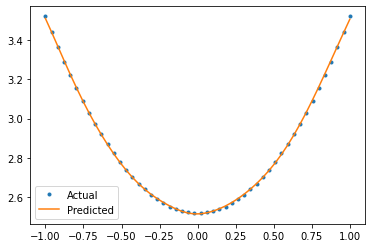

In [24]:
plt.plot(x, y, ".", label="Actual")
plt.plot(x, y_pred, "-", label="Predicted")
plt.legend()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
